# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_data = pd.read_csv('Datasets/creditcard.csv')
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [3]:
credit_data.shape

(284807, 31)

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

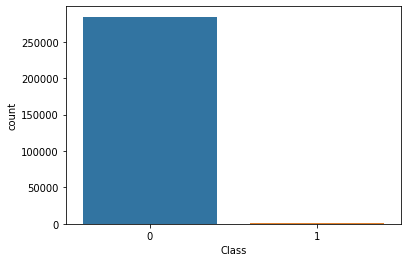

In [8]:
sns.countplot(x = 'Class', data = credit_data)

### The data is highly imbalanced.

In [9]:
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]
legit.shape, fraud.shape

((284315, 31), (492, 31))

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# Compare the values for both transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### To deal with imbalanced data, we will do undersampling

We will build a sample dataset contaiing similar distribution of legit and fraud transactions


In [13]:
legit_sample = legit.sample(n = 492)

In [14]:
legit_sample.shape

(492, 31)

#### Concatenating fraud and legit samples in a dataframe

In [15]:
new_data = pd.concat([legit_sample,fraud], axis = 0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68622,53068.0,-1.055285,-0.517861,1.397745,-0.164410,1.089642,-0.371035,-0.063665,-0.290042,0.198390,...,-0.091817,0.309676,-0.047165,-0.204277,-1.259140,0.859391,-0.155660,-0.040829,26.78,0
49503,44090.0,1.211871,-0.135322,1.049460,0.744780,-0.798870,-0.009832,-0.588110,0.066790,0.868982,...,-0.115592,-0.110438,-0.040455,-0.061385,0.341080,0.345522,0.019978,0.023960,11.49,0
48374,43615.0,1.250018,-0.091725,0.691747,1.017339,-0.326225,0.594376,-0.609541,0.197665,1.032808,...,-0.157523,-0.255997,-0.174199,-1.014531,0.591434,-0.321496,0.068562,0.023608,9.99,0
172880,121281.0,-1.121085,1.283310,-0.095784,-1.181746,0.975761,0.863333,0.379467,-2.252983,0.030478,...,2.300384,-0.518315,0.076545,-1.059559,-0.389538,-0.021551,0.314452,0.146886,55.05,0
20075,30769.0,0.922314,-0.008553,1.456877,2.528965,-0.407572,1.424078,-0.764411,0.577989,-0.164211,...,0.044587,0.232338,0.059659,-0.295692,0.106370,-0.005297,0.065338,0.025303,38.00,0


In [16]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_data.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91972.843496,-0.029913,0.088015,0.133812,-0.029903,0.018254,0.027734,-0.037299,0.057998,0.127977,...,0.017754,0.021484,-0.012545,-0.009429,0.010651,0.055597,-0.045942,0.014537,0.011558,72.719553
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting the data into features and targets

In [19]:
X = new_data.drop(columns = 'Class', axis = 1)
y = new_data.Class

In [20]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68622,53068.0,-1.055285,-0.517861,1.397745,-0.164410,1.089642,-0.371035,-0.063665,-0.290042,0.198390,...,0.191880,-0.091817,0.309676,-0.047165,-0.204277,-1.259140,0.859391,-0.155660,-0.040829,26.78
49503,44090.0,1.211871,-0.135322,1.049460,0.744780,-0.798870,-0.009832,-0.588110,0.066790,0.868982,...,-0.039129,-0.115592,-0.110438,-0.040455,-0.061385,0.341080,0.345522,0.019978,0.023960,11.49
48374,43615.0,1.250018,-0.091725,0.691747,1.017339,-0.326225,0.594376,-0.609541,0.197665,1.032808,...,-0.106565,-0.157523,-0.255997,-0.174199,-1.014531,0.591434,-0.321496,0.068562,0.023608,9.99
172880,121281.0,-1.121085,1.283310,-0.095784,-1.181746,0.975761,0.863333,0.379467,-2.252983,0.030478,...,-0.840922,2.300384,-0.518315,0.076545,-1.059559,-0.389538,-0.021551,0.314452,0.146886,55.05
20075,30769.0,0.922314,-0.008553,1.456877,2.528965,-0.407572,1.424078,-0.764411,0.577989,-0.164211,...,-0.138985,0.044587,0.232338,0.059659,-0.295692,0.106370,-0.005297,0.065338,0.025303,38.00


#### Split the data into training and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

### Model Training

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [23]:
train_pred = model.predict(X_train)
accuracy1 = accuracy_score(y_train, train_pred)
print('Accuracy for training data: ', accuracy1)

Accuracy for training data:  0.9479034307496823


In [24]:
test_pred = model.predict(X_test)
accuracy2 = accuracy_score(y_test, test_pred)
print('Accuracy for test data: ', accuracy2)

Accuracy for test data:  0.9035532994923858


In [25]:
legit_features = legit.drop('Class', axis = 1)
legit.target = legit.Class

C:\Users\Hp\AppData\Local\Temp\ipykernel_16032\3714810688.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  legit.target = legit.Class


In [26]:
legit_pred = model.predict(legit_features)
accuracy_3 = accuracy_score(legit.target, legit_pred)
accuracy_3

0.9498408455410372